Tutorial: Visualize the indicent field
=================
In this quick tutorial we demonstrate how to visualize fundamental fields without any structure (hence no scattering simulation is required).

We first load some modules
-------------------

In [1]:
import matplotlib.pyplot as plt

from pyGDM2 import fields
from pyGDM2 import tools
from pyGDM2 import visu

The field generator
--------------------------------------

We will use an oblique incident plane wave (*p*-polarized), partially reflected at a metallic layer between a thick glass substrate and vacuum. First we setup the field generator:

In [2]:
field_generator = fields.evanescent_planewave
kwargs = dict(theta_inc=45, polar='p', returnField='E')

Setup the test frame and evaluate the field
---------------------------------------------

Now we need to setup the test-frame. 
We use a thin metallic layer (lossy), sandwiched between glass and vacuum.
We want to plot the field in the *XZ* plane.

In [3]:
## --- layered environment
n3 = 1.0            # vacuum
n2 = 1.05 + 1.8j    # lossy interface layer (metallic)
spacing = 40.0      # thickness of interface layer n2 (in nm)
n1 = 1.5            # dielectric substrate

## --- 2D evaluation volume (plane)
projection = 'XZ'
r_probe = tools.generate_NF_map(-500,500,30, -400,600,30,0, projection=projection)

## -- evaluation of the field-generator
wavelength = 500
NF = tools.evaluate_incident_field(field_generator, wavelength, kwargs, r_probe, 
                            n1=n1,n2=n2,n3=n3, spacing=spacing)

/home/hans/.local/lib/python3.7/site-packages/pyGDM2-1.1rc1-py3.7-linux-x86_64.egg/pyGDM2/structures.py:154: UserWarning: Minimum structure Z-value lies below substrate level! Shifting structure bottom to Z=step/2.
  warnings.warn("Minimum structure Z-value lies below substrate level!" +


Plot the result of the field-generator
--------------------------------------------

/home/hans/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


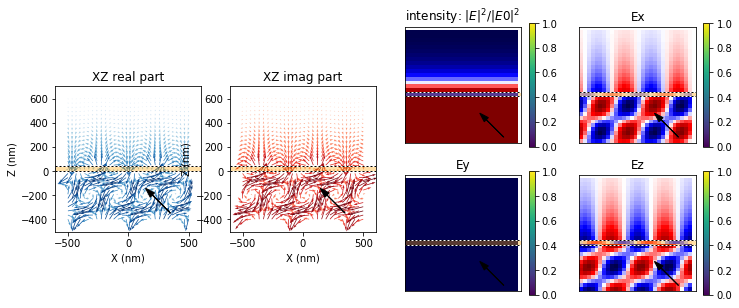

In [4]:
## -- helper function to plot the interface layer
def plot_layer():
    plt.axhline(0, color='w',lw=1); plt.axhline(0, dashes=[2,2], color='k',lw=1)
    plt.axhspan(0,spacing, color='k', ls='--', fc='orange', alpha=0.35)
    plt.axhline(spacing, color='w',lw=1); plt.axhline(spacing, dashes=[2,2], color='k',lw=1)
    plt.arrow(350, -350, -150, 150, head_width=50, head_length=80, fc='k', ec='k')

            


plt.figure(figsize=(12,5))
plt.subplot(141, aspect='equal')
v = visu.vectorfield(NF, complex_part='real', projection=projection, tit=projection+' real part', show=0)
plot_layer()

plt.subplot(142, aspect='equal')
v = visu.vectorfield(NF, complex_part='imag', cmap=plt.cm.Reds, projection=projection, tit=projection+' imag part',  show=0)
plot_layer()


plt.subplot(243, aspect='equal')
v = visu.vectorfield_color(NF, projection=projection, tit='intensity: '+r'$|E|^2/|E0|^2$', show=0)
plt.colorbar()
plt.xticks([]); plt.yticks([])
plot_layer()

plt.subplot(244, aspect='equal')
v = visu.vectorfield_color(NF, projection=projection, fieldComp='ex', tit='Ex', show=0)
plt.colorbar()
plt.xticks([]); plt.yticks([])
plot_layer()

plt.subplot(247, aspect='equal')
v = visu.vectorfield_color(NF, projection=projection, fieldComp='ey', tit='Ey', show=0)
plt.colorbar()
plt.xticks([]); plt.yticks([])
plot_layer()

plt.subplot(248, aspect='equal')
v = visu.vectorfield_color(NF, projection=projection, fieldComp='ez', tit='Ez', show=0)
plt.colorbar()
plt.xticks([]); plt.yticks([])
plot_layer()

plt.show()

**Note:** The black arrow indicates the direction and angle of incidence of the plane wave.